In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import copy

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [3]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [4]:
def call_di(S, H, K, T, r, q, sigma):
    if S > H:
        return C + E
    else:
        return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.881620804968748


В условиях примера 1 напишите универсальную функцию для оценки стоиимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу: 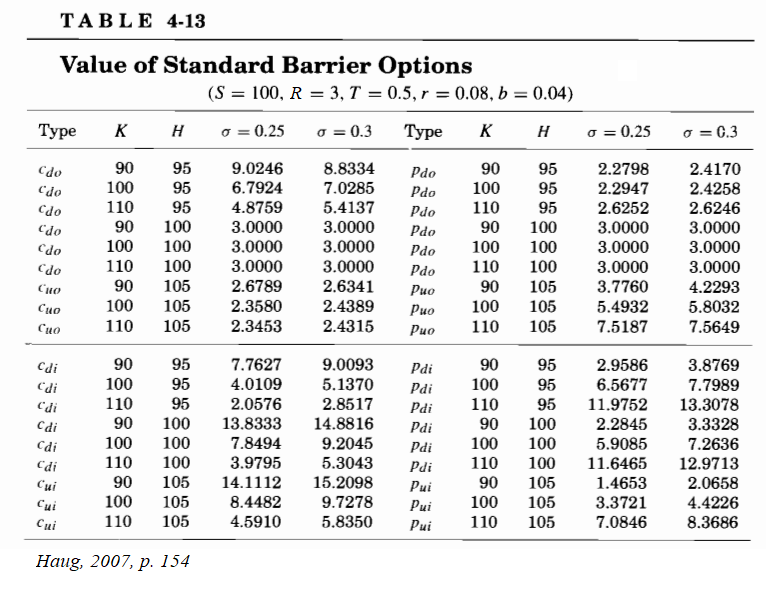

In [9]:
def calc_literals(
    S, H, K, R, T, r, b, q, sigma, eta, phi
):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)

    x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
    x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

    y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
    y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

    z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

    A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

    B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

    C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

    D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

    E = R*np.exp((b-r)*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                                norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

    F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))
    
    return A, B, C, D, E, F

In [10]:
def call_di(S, H, K, T, r, q, sigma):
    if K > H:
        return C + E
    else:
        return A - B + D + E

def call_do(S, H, K, T, r, q, sigma):
    if K > H:
        return A - C + F
    else:
        return B - D + F

def call_ui(S, H, K, T, r, q, sigma):
    if K > H:
        return A + E
    else:
        return B - C + D + E

def call_uo(S, H, K, T, r, q, sigma):
    if K > H:
        return F
    else:
        return A - B + C - D + F

barrier_calls = {'di': call_di, 'do': call_do, 'ui': call_ui, 'uo': call_uo}

def put_di(S, H, K, T, r, q, sigma):
    if K > H:
        return B - C + D + E
    else:
        return A + E

def put_do(S, H, K, T, r, q, sigma):
    if K > H:
        return A - B + C - D + F
    else:
        return F

def put_ui(S, H, K, T, r, q, sigma):
    if K > H:
        return A - B + D + E
    else:
        return C + E

def put_uo(S, H, K, T, r, q, sigma):
    if K > H:
        return B - D + F
    else:
        return A - C + F

barrier_puts = {'di': put_di, 'do': put_do, 'ui': put_ui, 'uo': put_uo}

In [11]:
call_put_params_dict = { # (x1, x2) == eta, phi
    'call': {
        'di': (1, 1), 'ui': (-1, 1), 'do': (1, 1), 'uo': (-1, 1)
    },
    'put': {
        'di': (1, -1), 'ui': (-1, -1), 'do': (1, -1), 'uo': (-1, -1)
    }
}

def barrier_call(
    S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type = 'di'
):
    assert barrier_type in list(barrier_calls.keys()), f'Unexpected barrier option type! Required {list(barrier_calls.keys())}, got {barrier_type}'
    call_func = barrier_calls[barrier_type]
    A, B, C, D, E, F = calc_literals(S, H, K, R, T, r, b, q, sigma, eta, phi)
    return call_func(S, H, K, T, r, q, sigma)

def barrier_put(
    S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type = 'di'
):
    assert barrier_type in list(barrier_puts.keys()), f'Unexpected barrier option type! Required {list(barrier_puts.keys())}, got {barrier_type}'
    call_func = barrier_puts[barrier_type]
    A, B, C, D, E, F = calc_literals(S, H, K, R, T, r, b, q, sigma, eta, phi)
    return call_func(S, H, K, T, r, q, sigma)

options = {'call': barrier_call, 'put': barrier_put}
def barrier_option(
    S, H, K, R, T, r, b, q, sigma, option_type: str = 'call', barrier_type = 'di',
):
    assert option_type in list(options.keys()), f'Incorrect option type! Required {list(options.keys())}, got {option_type}'
    eta, phi = call_put_params_dict[option_type][barrier_type]
    option = options[option_type]
    return option(S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type)

In [12]:
option_type = 'call'
barrier_type = 'ui'
eta, phi = call_put_params_dict[option_type][barrier_type]
barrier_option(S, H, K, R, T, r, b, q, sigma, option_type=option_type, barrier_type=barrier_type)

13.044925712574155

In [13]:
eta, phi = call_put_params_dict['call']['di']
barrier_call(S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type = 'di')

14.881620804968748

Задача 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день. Сравните полученные результаты с результатами, полученными при использовании гэп опционов, бинарных опционов. Подкрепите выводы иллюстративными графиками.

In [16]:
c_ui, c_do

(13.044925712574155, 3.0)

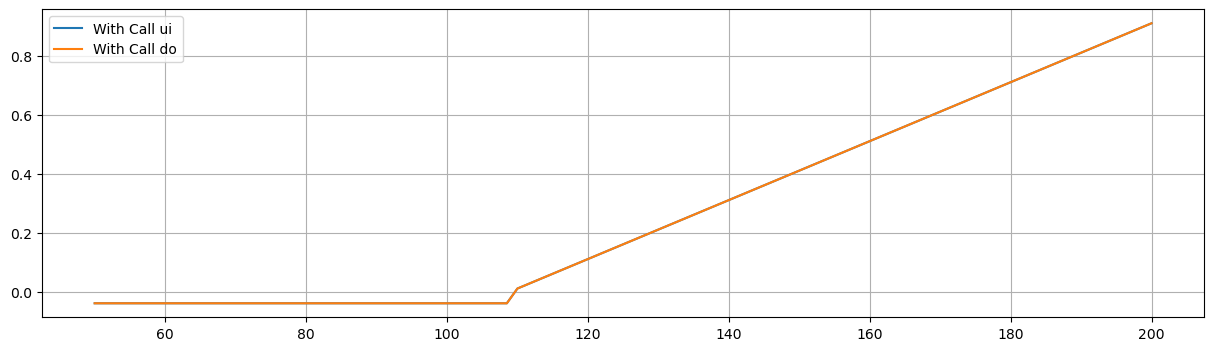

In [15]:
# task 1 

N = 100_000
S = 100
R = 3
T = 0.5
r = 0.08
b = 0.04
sigma = 0.25
q = 0

risk_part = N - N * np.exp(-r * T)

# a) call ui
K = 105
H = 110
option_type = 'call'
barrier_type = 'ui'
c_ui = barrier_option(S, H, K, R, T, r, b, q, sigma, option_type=option_type, barrier_type=barrier_type)
PR = S * round(risk_part / c_ui) / N

n = 101
underlying_asset = np.linspace(0.5 * S, 2 * S, n)
underlying_asset_profit = underlying_asset / S - 1
underlying_asset_corrected = copy.deepcopy(underlying_asset)
underlying_asset_corrected[underlying_asset_corrected < H] = 0
option_profit = np.maximum(0, underlying_asset_corrected - K) / S
struct_product_profit = option_profit - round(risk_part / c_ui) * c_ui / N
plt.figure(figsize=(15,4))
plt.plot(underlying_asset, struct_product_profit, label='With Call ui')

# b) call do 
K = 120
H = 90
option_type = 'call'
barrier_type = 'do'
c_do = barrier_option(S, H, K, R, T, r, b, q, sigma, option_type=option_type, barrier_type=barrier_type)
PR = S * round(risk_part / c_do) / N

underlying_asset_corrected1 = copy.deepcopy(underlying_asset)
underlying_asset_corrected1[underlying_asset_corrected < H] = 0
option_profit1 = np.maximum(0, underlying_asset_corrected1 - K) / S
struct_product_profit1 = option_profit1 - round(risk_part / c_do) * c_do / N
plt.plot(underlying_asset, struct_product_profit, label='With Call do')
plt.grid(); plt.legend()
plt.show()

In [35]:
c_ui, c_do

(109.0816524538027, 99.03672674122855)

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [5]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95


d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.733874868545689
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [17]:
S = 100
H = 95
K = 92

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95


d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  4.868988981398975
rebate =  0.448464125401398
